In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Data loading and overview

In [2]:
#preprocessed data
pp= pd.read_csv(r'https://github.com/mmortazavi/ml_demystified/raw/main/projects/gis/gis_data.csv')
pp.drop(['Unnamed: 0'], axis=1,inplace=True)

In [4]:
#raw data
raw=pd.read_excel('https://github.com/mmortazavi/ml_demystified/raw/main/projects/gis/raw_data.xlsx') 

In [9]:
# pp column names
for col in pp.columns:
    print(col)

city
postal code
city_GIS_1
city_GIS_2
branch_GIS_1
branch_GIS_2
postalcode_GIS_1
postalcode_GIS_2


"postal code" is the target variable of the preprocessed dataset. 

In [5]:
# raw column names
for col in raw.columns:
    print(col)

نام
نام خانوادگی
کد ملی
موبایل
مرحله ثبت نام
شهر مورد تقاضا
شهر محل سکونت
آدرس متقاضی
کدپستی
وضعیت بارگذاری مدارک
وضعیت سرپرستی
شغل
جنسیت
میزان تحصیلات
نام پدر
شماره شناسنامه
تاریخ تولد
تعداد فرزندان
بعد خانوار
کد شعبه
نام شعبه
شماره حساب


<!-- 'کدپستی'      ,    'شهر مورد تقاضا'    ,   'شهر محل سکونت'      are related to the target. -->

In [5]:
#renaming columns to english
# raw.rename(columns={"کدپستی": "postal code" , "شهر مورد تقاضا"  : "city_requested " , "شهر محل سکونت" :"city_residance"} , inplace=True)
# col3=raw[["postal code",'city_residance','city_requested ']]

In [6]:
#concatenating pp and col3 
# pp= pd.concat([pp, col3], axis=1) #final dataset

getting information on pp

In [38]:
print(pp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city              6899 non-null   object 
 1   postal code       6214 non-null   object 
 2   city_GIS_1        6886 non-null   float64
 3   city_GIS_2        6886 non-null   float64
 4   branch_GIS_1      4633 non-null   float64
 5   branch_GIS_2      4633 non-null   float64
 6   postalcode_GIS_1  5197 non-null   float64
 7   postalcode_GIS_2  5179 non-null   float64
dtypes: float64(6), object(2)
memory usage: 431.3+ KB
None


In [4]:
total_cells = np.product(pp.shape) #6899 * 8
total_cells

55192

In [9]:
(((pp.duplicated().sum()))/total_cells) * 100

10.575808088128715

In [10]:
# duplicated
(pp.duplicated().sum()).sum() #returns 5837 #total duplicated rows
# Dropping duplicate values
pp.drop_duplicates(inplace=True)

In [11]:
#Null Value Distribution:
pp.isnull().sum()

city                  0
postal code          12
city_GIS_1           13
city_GIS_2           13
branch_GIS_1        374
branch_GIS_2        374
postalcode_GIS_1    862
postalcode_GIS_2    876
dtype: int64

In [14]:
# how many total missing values do we have?
total_missing =(pp.isnull().sum()).sum() #returns 2524


# percent of data that is missing
(total_missing/total_cells) * 100

4.573126540078272

In [15]:
((pp.isnull().sum())/total_cells) * 100

city                0.000000
postal code         0.021742
city_GIS_1          0.023554
city_GIS_2          0.023554
branch_GIS_1        0.677634
branch_GIS_2        0.677634
postalcode_GIS_1    1.561821
postalcode_GIS_2    1.587187
dtype: float64

In [17]:
#city_encoding
labelencoder = LabelEncoder()
pp['city_1'] = labelencoder.fit_transform(pp['city'])

#Set the index to become the 'city_1' column:
pp.set_index('city_1',inplace=True)

#sort dataframe by index in ascending order
pp.sort_index(ascending=True,inplace=True)

# Define postal code to drop null values
pp.dropna(subset=['postal code'], inplace=True)

In [18]:
#each city'value label
(pp[['city']]).drop_duplicates()

,city
city_1,
0,آبگرم
1,آبیک
2,آوج
3,ارداق
4,اسفرورین
5,اصفهان
6,اقبالیه
7,الوند
8,ایرانشهر


In [19]:
#dropping city
pp.drop(['city'], axis=1,inplace=True)

In [20]:
pp

,postal code,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,,
0,3466173351,35.756778,49.28575,36.069361,49.694056,NaN,NaN
0,3466181168,35.756778,49.28575,NaN,NaN,NaN,NaN
0,3466173331,35.756778,49.28575,NaN,NaN,NaN,NaN
0,"35.756778, 49.285750",35.756778,49.28575,NaN,NaN,35.756778,49.28575
0,3463111168,35.756778,49.28575,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
34,3479111111,36.371667,49.66200,NaN,NaN,NaN,NaN
34,"36.371667, 49.662000",36.371667,49.66200,NaN,NaN,36.371667,49.66200
34,3479141176,36.371667,49.66200,NaN,NaN,NaN,NaN


# Visualizing the data #pp

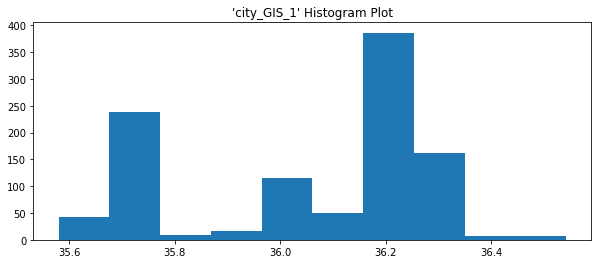

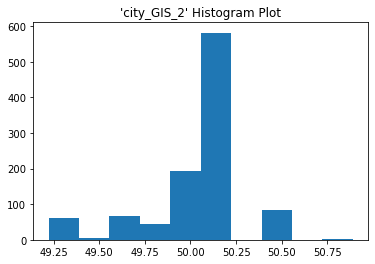

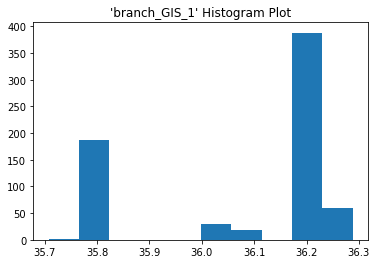

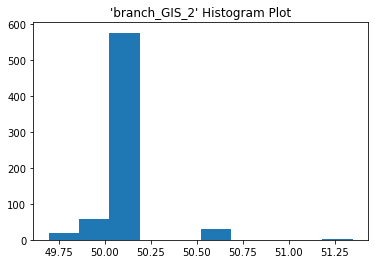

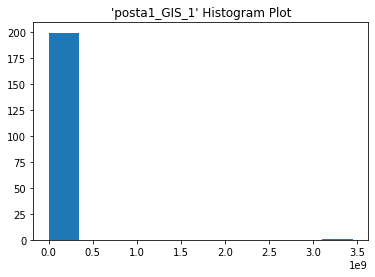

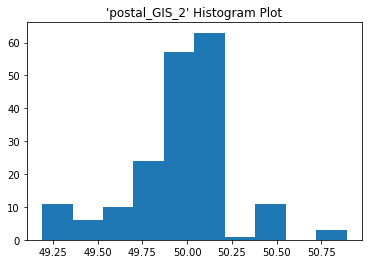

In [100]:
#Histogram Plot
plt.figure(figsize=(10, 4))

plt.hist(x[['city_GIS_1']])
plt.title("'city_GIS_1' Histogram Plot")
plt.show()


plt.hist(x[['city_GIS_2']])
plt.title("'city_GIS_2' Histogram Plot")
plt.show()

plt.hist(x[['branch_GIS_1']])
plt.title("'branch_GIS_1' Histogram Plot")
plt.show()

plt.hist(x[['branch_GIS_2']])
plt.title("'branch_GIS_2' Histogram Plot")
plt.show()

plt.hist(x[['postalcode_GIS_1']])
plt.title("'posta1_GIS_1' Histogram Plot")
plt.show()

plt.hist(x[['postalcode_GIS_2']])
plt.title("'postal_GIS_2' Histogram Plot")
plt.show()

In [21]:
#defining x & y
x=pp.drop(['postal code'], axis=1)

y=pp[['postal code']]

# First outlier treatment then missing data imputation ! 

In [22]:
#discovering outlier and removing them.

In [23]:
x.isnull().sum()

city_GIS_1           13
city_GIS_2           13
branch_GIS_1        368
branch_GIS_2        368
postalcode_GIS_1    850
postalcode_GIS_2    864
dtype: int64

In [26]:
# Since the data doesn’t follow a normal distribution ,outlier data points will be calculated by interquartile range (IQR).
#If the value is not an outlier, it will display as NaN .

def find_outliers_IQR(df):
    

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

In [27]:
find_outliers_IQR(x)

,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
city_1,,,,,,
0,NaN,49.28575,NaN,49.694056,NaN,NaN
0,NaN,49.28575,NaN,NaN,NaN,NaN
0,NaN,49.28575,NaN,NaN,NaN,NaN
0,NaN,49.28575,NaN,NaN,NaN,NaN
0,NaN,49.28575,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
34,NaN,49.66200,NaN,NaN,NaN,NaN
34,NaN,49.66200,NaN,NaN,NaN,NaN
34,NaN,49.66200,NaN,NaN,NaN,NaN


In [28]:
find_outliers_IQR(x).info() 
# null values are reflected as NaN 
# branch_gis_2 : 48 outliers
# postalcode_GIS_1 : 33 outliers
# postalcode_GIS_2 : 3 outliers
# city_GIS_2       : 226 outliers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city_GIS_1        0 non-null      float64
 1   city_GIS_2        226 non-null    float64
 2   branch_GIS_1      0 non-null      float64
 3   branch_GIS_2      48 non-null     float64
 4   postalcode_GIS_1  33 non-null     float64
 5   postalcode_GIS_2  3 non-null      float64
dtypes: float64(6)
memory usage: 57.4 KB


In [29]:
#mean imputation

def impute_outliers_IQR(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    upper = df[~(df>(q3+1.5*IQR))].max()

    lower = df[~(df<(q1-1.5*IQR))].min()

    df = np.where(df > upper,df.mean(),np.where(df < lower,df.mean(),df))
    

    return df

In [30]:
new_x=pd.DataFrame(impute_outliers_IQR(x),columns=['city_GIS_1', 'city_GIS_2',
                                             'branch_GIS_1','branch_GIS_2','postalcode_GIS_1',"postalcode_GIS_2"])

In [48]:
new_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city_GIS_1        1037 non-null   float64
 1   city_GIS_2        1037 non-null   float64
 2   branch_GIS_1      682 non-null    float64
 3   branch_GIS_2      682 non-null    float64
 4   postalcode_GIS_1  200 non-null    float64
 5   postalcode_GIS_2  186 non-null    float64
dtypes: float64(6)
memory usage: 49.3 KB


In [49]:
find_outliers_IQR(new_x).info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city_GIS_1        0 non-null      float64
 1   city_GIS_2        17 non-null     float64
 2   branch_GIS_1      0 non-null      float64
 3   branch_GIS_2      0 non-null      float64
 4   postalcode_GIS_1  33 non-null     float64
 5   postalcode_GIS_2  1 non-null      float64
dtypes: float64(6)
memory usage: 49.3 KB


c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


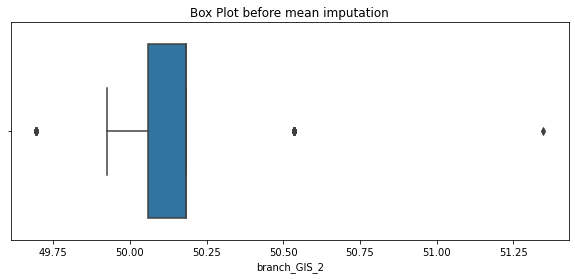

c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


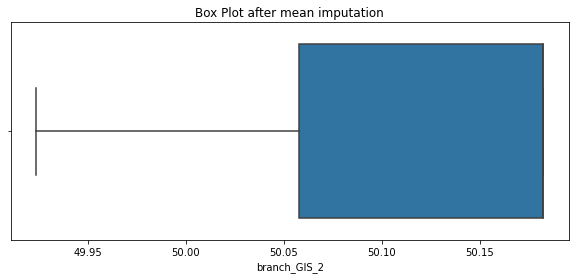

In [58]:
#visualization
plt.figure(figsize=(10, 4))
sns.boxplot(x['branch_GIS_2'])
plt.title("Box Plot before mean imputation")
plt.show()


plt.figure(figsize=(10, 4))
sns.boxplot(new_x['branch_GIS_2'])
plt.title("Box Plot after mean imputation")
plt.show()   

In [33]:
new_x.isnull().sum()

city_GIS_1           13
city_GIS_2           13
branch_GIS_1        368
branch_GIS_2        368
postalcode_GIS_1    850
postalcode_GIS_2    864
dtype: int64

In [35]:
my_imputer = SimpleImputer(strategy='mean')
imputed_x = pd.DataFrame(my_imputer.fit_transform(new_x),columns=['city_GIS_1', 'city_GIS_2',
                                             'branch_GIS_1','branch_GIS_2','postalcode_GIS_1',"postalcode_GIS_2"])

In [36]:
imputed_x

,city_GIS_1,city_GIS_2,branch_GIS_1,branch_GIS_2,postalcode_GIS_1,postalcode_GIS_2
0,35.756778,50.036984,36.069361,50.133142,4.587266e+06,49.957304
1,35.756778,50.036984,36.089383,50.125918,4.587266e+06,49.957304
2,35.756778,50.036984,36.089383,50.125918,4.587266e+06,49.957304
3,35.756778,50.036984,36.089383,50.125918,3.575678e+01,49.285750
4,35.756778,50.036984,36.089383,50.125918,4.587266e+06,49.957304
...,...,...,...,...,...,...
1045,36.371667,50.036984,36.089383,50.125918,4.587266e+06,49.957304
1046,36.371667,50.036984,36.089383,50.125918,3.637167e+01,49.662000
1047,36.371667,50.036984,36.089383,50.125918,4.587266e+06,49.957304
1048,36.371667,50.036984,36.089383,50.125918,4.587266e+06,49.957304


<AxesSubplot:>

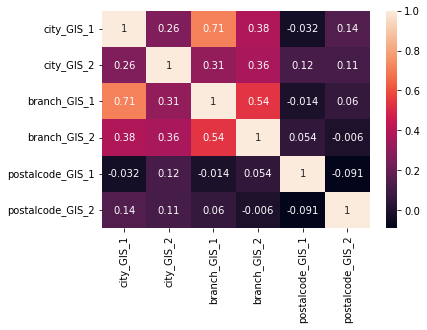

In [78]:
#corr visualization
sns.heatmap(imputed_x.corr(),annot=True)

In [79]:
x_train, x_test, y_train, y_test = train_test_split( imputed_x , y , test_size=0.6)

In [80]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [81]:
# Applying PCA :
    
pca     = PCA()
x_train = pca.fit_transform(x_train)
x_test  = pca.transform(x_test)

In [71]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.38287092, 0.19242075, 0.16468911, 0.12863622, 0.09025018,
       0.04113282])

In [72]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [73]:
test_scores  = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    
    knn.fit(x_train,np.ravel(y_train))
    

    test_scores.append(knn.score(x_test,np.ravel(y_test)))       

In [74]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 5.238095238095238 % and k = [1]
